In [8]:
# Importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [9]:
# Extracting and refining the data into Data Frames
rt_df = pd.read_csv("Data/ReactionTimes.csv")
lpd_df = pd.read_csv("Data/LanePositionDifference.csv")
bi_df = pd.read_csv("Data/BrakingInput.csv")
swa_df = pd.read_csv("Data/SteeringWheelAngles.csv")
swv_df = pd.read_csv("Data/SteeringWheelVelocity.csv")

# Rename all the unnamed columns for consistency and easy data handeling
first_columns = ["Participant_ID", "RSVP", "TTS", "Trial_No"]

rt_columns = first_columns + ["DP" + str(i) for i in range(0, rt_df.shape[1] - 4)]
rt_df.columns = rt_columns
lpd_columns = first_columns + ["DP" + str(i) for i in range(0, lpd_df.shape[1] - 4)]
lpd_df.columns = lpd_columns
bi_columns = first_columns + ["DP" + str(i) for i in range(0, bi_df.shape[1] - 4)]
bi_df.columns = bi_columns
swa_columns = first_columns + ["DP" + str(i) for i in range(0, swa_df.shape[1] - 4)]
swa_df.columns = swa_columns
swv_columns = first_columns + ["DP" + str(i) for i in range(0, swv_df.shape[1] - 4)]
swv_df.columns = swv_columns

In [10]:
# Exclude T01 participant for the analysis
rt_df = rt_df[rt_df["Participant_ID"] != "T01"]
lpd_df = lpd_df[lpd_df["Participant_ID"] != "T01"]
bi_df = bi_df[bi_df["Participant_ID"] != "T01"]
swa_df = swa_df[swa_df["Participant_ID"] != "T01"]
swv_df = swv_df[swv_df["Participant_ID"] != "T01"]

    TPT         AA Disabled          AA Enabled
0   STP  1.0786945000000001  0.9908044999999999
1  RSVP  0.8507901250000001           1.0799675
Shapiro Test for RT_stp; p-value:  0.17765752971172333
Shapiro Test for RT_rsvp; p-value:  0.4544706344604492
Shapiro Test for RT_stpa; p-value:  0.07149973511695862
Shapiro Test for RT_rsvpa; p-value:  0.002123786136507988
H_a: RT_rsvp = RT_stp ; H_a: RT_rsvp < RT_stp
Ttest_relResult(statistic=-1.0833074183697236, pvalue=0.15728478884225044)
Ttest_relResult(statistic=0.6358386173070432, pvalue=0.7274497400736835)
H_a: RT_aae = RT_aad ; H_a: RT_aae < RT_aad
Ttest_relResult(statistic=-0.9957715499637303, pvalue=0.17626460475025083)
Ttest_relResult(statistic=0.820604200386414, pvalue=0.7805405212946627)


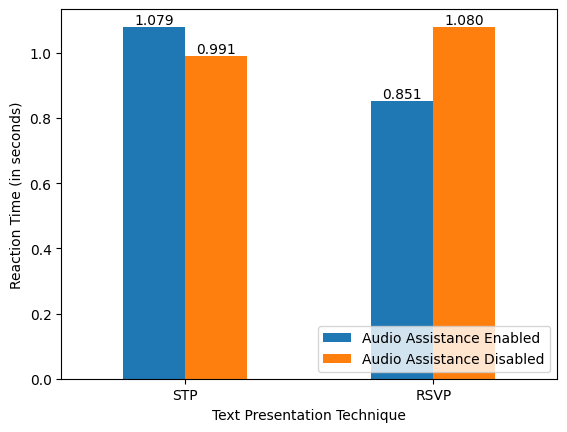

In [11]:
# Analysing Reaction times
rt_results_array = np.array([
    ["STP",np.mean(rt_df[(rt_df["RSVP"] == 0) & (rt_df["TTS"] == 0)]["DP0"]), np.mean(rt_df[(rt_df["RSVP"] == 0) & (rt_df["TTS"] == 1)]["DP0"])],
    ["RSVP",np.mean(rt_df[(rt_df["RSVP"] == 1) & (rt_df["TTS"] == 0)]["DP0"]), np.mean(rt_df[(rt_df["RSVP"] == 1) & (rt_df["TTS"] == 1)]["DP0"])],
])
rt_results_df = pd.DataFrame(rt_results_array, columns = ["TPT", "AA Disabled", "AA Enabled"])
print(rt_results_df)

# Converting the column types
rt_results_df["TPT"] = rt_results_df["TPT"].astype(str)
rt_results_df["AA Disabled"] = rt_results_df["AA Disabled"].astype(float)
rt_results_df["AA Enabled"] = rt_results_df["AA Enabled"].astype(float)

# Create seperate arrays for 2 x 2 cases
rt_stp = rt_df[(rt_df["RSVP"] == 0) & (rt_df["TTS"] == 0)]["DP0"].values
rt_stpa = rt_df[(rt_df["RSVP"] == 0) & (rt_df["TTS"] == 1)]["DP0"].values
rt_rsvp = rt_df[(rt_df["RSVP"] == 1) & (rt_df["TTS"] == 0)]["DP0"].values
rt_rsvpa = rt_df[(rt_df["RSVP"] == 1) & (rt_df["TTS"] == 1)]["DP0"].values

# Test if the distribution is normal.
print("Shapiro Test for RT_stp; p-value: ", stats.shapiro(rt_stp)[1])
print("Shapiro Test for RT_rsvp; p-value: ", stats.shapiro(rt_rsvp)[1])
print("Shapiro Test for RT_stpa; p-value: ", stats.shapiro(rt_stpa)[1])
print("Shapiro Test for RT_rsvpa; p-value: ", stats.shapiro(rt_rsvpa)[1])
# Hence, the distributions are normal except for rt_rsvpa.

# Perform P-tests for testing the alternate hypothesis
# Test if H_a: RT_rsvp < RT_stp
print("H_a: RT_rsvp = RT_stp ; H_a: RT_rsvp < RT_stp")
print(stats.ttest_rel(a = rt_rsvp, b = rt_stp, alternative = "less"))
print(stats.ttest_rel(a = rt_rsvpa, b = rt_stpa, alternative = "less"))
# Test if H_a: RT_aae < RT_aad
print("H_a: RT_aae = RT_aad ; H_a: RT_aae < RT_aad")
print(stats.ttest_rel(a = rt_rsvp, b = rt_rsvpa, alternative = "less"))
print(stats.ttest_rel(a = rt_stp, b = rt_stpa, alternative = "less"))

# CONCLUSION:
# No significant difference was observed.

bplot = rt_results_df.plot(x = "TPT", kind = "bar", rot = 0)
bplot.legend(["Audio Assistance Enabled", "Audio Assistance Disabled"], loc="lower right")
plt.xlabel("Text Presentation Technique")
plt.ylabel("Reaction Time (in seconds)")
for p in bplot.containers:
    bplot.bar_label(p, fmt='%.3f', label_type='edge')

Shapiro Test for alpo_stp; p-value: 0.03318927809596062
Shapiro Test for alpo_rsvp; p-value: 0.6752631664276123
Shapiro Test for alpo_stpa; p-value: 0.23919451236724854
Shapiro Test for alpo_rsvpa; p-value: 0.49997255206108093 

H_0: alpo_rsvp = alpo_stp ; H_a: alpo_rsvp < alpo_stp
Ttest_relResult(statistic=0.22667888851050993, pvalue=0.5864246090924532)

H_0: alpo_rsvpa = alpo_stpa ; H_a: alpo_rsvpa < alpo_stpa
Ttest_relResult(statistic=-2.2162532442562313, pvalue=0.03111017472356976)

H_0: alpo_rsvpa = alpo_rsvp ; H_a: alpo_rsvpa < alpo_rsvp
Ttest_relResult(statistic=-2.097553521724411, pvalue=0.03706926516774357)

H_0: alpo_stpa = alpo_stp ; H_a: alpo_stpa < alpo_stp
Ttest_relResult(statistic=0.4927668228070305, pvalue=0.6813715910362342)

H_0: alpo_rsvp = alpo_stp ; H_a: alpo_rsvp > alpo_stp
Ttest_relResult(statistic=0.22667888851050993, pvalue=0.41357539090754686)

H_0: alpo_rsvpa = alpo_stpa ; H_a: alpo_rsvpa > alpo_stpa
Ttest_relResult(statistic=-2.2162532442562313, pvalue=0.968

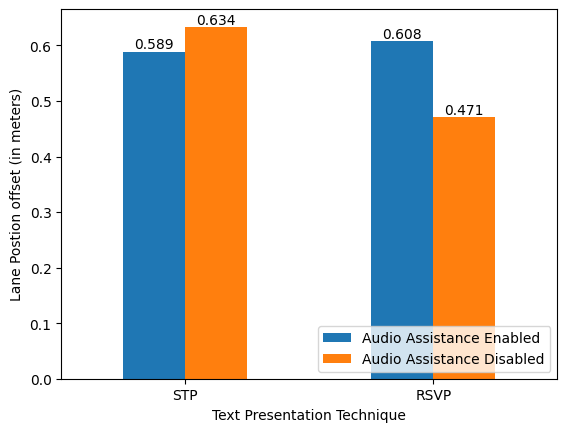

In [19]:
# Analyzing the Average Lane Position Offset.
avg_lane_offsets = []
for i in range(0, lpd_df.shape[0]):
    dp_array = [dp for dp in lpd_df.iloc[i].values.tolist()[4:] if not pd.isna(dp)]
    avg_lane_offsets.append(sum(dp_array)/len(dp_array))
lpd_df["AVG"] = avg_lane_offsets

# Create seperate arrays for 2 x 2 cases
alpo_stp = lpd_df[(lpd_df["RSVP"] == 0) & (lpd_df["TTS"] == 0)]["AVG"].values
alpo_stpa = lpd_df[(lpd_df["RSVP"] == 0) & (lpd_df["TTS"] == 1)]["AVG"].values
alpo_rsvp = lpd_df[(lpd_df["RSVP"] == 1) & (lpd_df["TTS"] == 0)]["AVG"].values
alpo_rsvpa = lpd_df[(lpd_df["RSVP"] == 1) & (lpd_df["TTS"] == 1)]["AVG"].values

# Perform P-tests foer texting the hypothesis
print("Shapiro Test for alpo_stp; p-value:", stats.shapiro(alpo_stp)[1])
print("Shapiro Test for alpo_rsvp; p-value:", stats.shapiro(alpo_rsvp)[1])
print("Shapiro Test for alpo_stpa; p-value:", stats.shapiro(alpo_stpa)[1])
print("Shapiro Test for alpo_rsvpa; p-value:", stats.shapiro(alpo_rsvpa)[1], "\n")
# Test is the distribution is normal.

# Perform P-tests for testing the alternate hypothesis
# Test if H_a: alpo_rsvp < alpo_stp
print("H_0: alpo_rsvp = alpo_stp ; H_a: alpo_rsvp < alpo_stp")
print(stats.ttest_rel(a = alpo_rsvp, b = alpo_stp, alternative = "less"))
print("\nH_0: alpo_rsvpa = alpo_stpa ; H_a: alpo_rsvpa < alpo_stpa")
print(stats.ttest_rel(a = alpo_rsvpa, b = alpo_stpa, alternative = "less"))

# Test if H_a: alpo_aae < alpo_aad
print("\nH_0: alpo_rsvpa = alpo_rsvp ; H_a: alpo_rsvpa < alpo_rsvp")
print(stats.ttest_rel(a = alpo_rsvpa, b = alpo_rsvp, alternative = "less"))
print("\nH_0: alpo_stpa = alpo_stp ; H_a: alpo_stpa < alpo_stp")
print(stats.ttest_rel(a = alpo_stpa, b = alpo_stp, alternative = "less"))

# Test if H_a: alpo_rsvp > alpo_stp
print("\nH_0: alpo_rsvp = alpo_stp ; H_a: alpo_rsvp > alpo_stp")
print(stats.ttest_rel(a = alpo_rsvp, b = alpo_stp, alternative = "greater"))
print("\nH_0: alpo_rsvpa = alpo_stpa ; H_a: alpo_rsvpa > alpo_stpa")
print(stats.ttest_rel(a = alpo_rsvpa, b = alpo_stpa, alternative = "greater"))

# Test if H_a: alpo_aae > alpo_aad
print("\nH_0: alpo_rsvpa = alpo_rsvp ; H_a: alpo_rsvpa > alpo_rsvp")
print(stats.ttest_rel(a = alpo_rsvpa, b = alpo_rsvp, alternative = "greater"))
print("\nH_0: alpo_stpa = alpo_stp ; H_a: alpo_stpa > alpo_stp")
print(stats.ttest_rel(a = alpo_stpa, b = alpo_stp, alternative = "greater"))

# CONCLUSION:
# With audio assistance, RSVP was better than STP
# RSVP with audio assistance is better than RSVP without audio assistance

# Generating data frame for ALPO results
alpo_results_array = np.array([
    ["STP",np.mean(alpo_stp), np.mean(alpo_stpa)],
    ["RSVP",np.mean(alpo_rsvp), np.mean(alpo_rsvpa)],
])
alpo_results_df = pd.DataFrame(alpo_results_array, columns = ["TPT", "AA Disabled", "AA Enabled"])
print(alpo_results_df)

# Converting the column types
alpo_results_df["TPT"] = alpo_results_df["TPT"].astype(str)
alpo_results_df["AA Disabled"] = alpo_results_df["AA Disabled"].astype(float)
alpo_results_df["AA Enabled"] = alpo_results_df["AA Enabled"].astype(float)

# Plotting paired bar graph
bplot = alpo_results_df.plot(x = "TPT", kind = "bar", rot = 0)
bplot.legend(["Audio Assistance Enabled", "Audio Assistance Disabled"], loc="lower right")
plt.xlabel("Text Presentation Technique")
plt.ylabel("Lane Postion offset (in meters)")
for p in bplot.containers:
    bplot.bar_label(p, fmt='%.3f', label_type='edge')

In [17]:
# Analyzing the Maximum Steering Angle Velocity
MSVs = []
for i in range(0, swv_df.shape[0]):
    dp_array = [dp for dp in swv_df.iloc[i].values.tolist()[4:] if not pd.isna(dp)]
    MSVs.append(max(dp_array))
swv_df["MAX"] = MSVs
print(MSVs)
# Create seperate arrays for 2 x 2 cases
msav_stp = swv_df[(swv_df["RSVP"] == 0) & (swv_df["TTS"] == 0)]["MAX"].values
msav_stpa = swv_df[(swv_df["RSVP"] == 0) & (swv_df["TTS"] == 1)]["MAX"].values
msav_rsvp = swv_df[(swv_df["RSVP"] == 1) & (swv_df["TTS"] == 0)]["MAX"].values
msav_rsvpa = swv_df[(swv_df["RSVP"] == 1) & (swv_df["TTS"] == 1)]["MAX"].values

# Perform P-tests foer texting the hypothesis
print("Shapiro Test for msav_stp; p-value:", stats.shapiro(msav_stp)[1])
print("Shapiro Test for msav_rsvp; p-value:", stats.shapiro(msav_rsvp)[1])
print("Shapiro Test for msav_stpa; p-value:", stats.shapiro(msav_stpa)[1])
print("Shapiro Test for msav_rsvpa; p-value:", stats.shapiro(msav_rsvpa)[1], "\n")
# Test is the distribution is normal.

# Perform P-tests for testing the alternate hypothesis
# Test if H_a: msav_rsvp < msav_stp
print("H_0: msav_rsvp = msav_stp ; H_a: msav_rsvp < msav_stp")
print(stats.ttest_rel(a = msav_rsvp, b = msav_stp, alternative = "less"))
print("\nH_0: msav_rsvpa = msav_stpa ; H_a: msav_rsvpa < msav_stpa")
print(stats.ttest_rel(a = msav_rsvpa, b = msav_stpa, alternative = "less"))

# Test if H_a: msav_aae < msav_aad
print("\nH_0: msav_rsvpa = msav_rsvp ; H_a: msav_rsvpa < msav_rsvp")
print(stats.ttest_rel(a = msav_rsvpa, b = msav_rsvp, alternative = "less"))
print("\nH_0: msav_stpa = msav_stp ; H_a: msav_stpa < msav_stp")
print(stats.ttest_rel(a = msav_stpa, b = msav_stp, alternative = "less"))

# Test if H_a: msav_rsvp > msav_stp
print("\nH_0: msav_rsvp = msav_stp ; H_a: msav_rsvp > msav_stp")
print(stats.ttest_rel(a = msav_rsvp, b = msav_stp, alternative = "greater"))
print("\nH_0: msav_rsvpa = msav_stpa ; H_a: msav_rsvpa > msav_stpa")
print(stats.ttest_rel(a = msav_rsvpa, b = msav_stpa, alternative = "greater"))

# Test if H_a: msav_aae > msav_aad
print("\nH_0: msav_rsvpa = msav_rsvp ; H_a: msav_rsvpa > msav_rsvp")
print(stats.ttest_rel(a = msav_rsvpa, b = msav_rsvp, alternative = "greater"))
print("\nH_0: msav_stpa = msav_stp ; H_a: msav_stpa > msav_stp")
print(stats.ttest_rel(a = msav_stpa, b = msav_stp, alternative = "greater"))

# CONCLUSION:
# RSVP with audio assistance is better than RSVP without audio assistance

[0.098274, 0.079099, 0.103067, 0.160593, 0.040748, 0.13183, 0.057526, 0.098274, 0.18696, 0.09348, 0.117449, 0.36193400000000003, 0.12464000000000001, 0.064717, 0.18696, 0.129434, 0.22770700000000002, 0.215723, 0.22770700000000002, 0.285233, 0.12703699999999998, 0.26366100000000003, 0.230104, 0.12464000000000001, 0.184563, 0.177372, 0.170181, 0.16538699999999998, 0.129434, 0.299615, 0.220516, 0.076701]
Shapiro Test for msav_stp; p-value: 0.5315306186676025
Shapiro Test for msav_rsvp; p-value: 0.3301122188568115
Shapiro Test for msav_stpa; p-value: 0.48438096046447754
Shapiro Test for msav_rsvpa; p-value: 0.12296171486377716 

H_0: msav_rsvp = msav_stp ; H_a: msav_rsvp < msav_stp
Ttest_relResult(statistic=-0.4977933237912536, pvalue=0.31694231167738596)

H_0: msav_rsvpa = msav_stpa ; H_a: msav_rsvpa < msav_stpa
Ttest_relResult(statistic=-0.7464036548387852, pvalue=0.2398677537919084)

H_0: msav_rsvpa = msav_rsvp ; H_a: msav_rsvpa < msav_rsvp
Ttest_relResult(statistic=-1.9946525133583375,

In [24]:
# Analyzing the Standard Deviation of Steering Wheel Angle
SDSWAs = []
for i in range(0, swa_df.shape[0]):
    dp_array = [dp for dp in lpd_df.iloc[i].values.tolist()[4:] if not pd.isna(dp)]
    SDSWAs.append(np.std(dp_array))
swa_df["SD"] = SDSWAs

# Create seperate arrays for 2 x 2 cases
sdswa_stp = swa_df[(swa_df["RSVP"] == 0) & (swa_df["TTS"] == 0)]["SD"].values
sdswa_stpa = swa_df[(swa_df["RSVP"] == 0) & (swa_df["TTS"] == 1)]["SD"].values
sdswa_rsvp = swa_df[(lpd_df["RSVP"] == 1) & (swa_df["TTS"] == 0)]["SD"].values
sdswa_rsvpa = swa_df[(lpd_df["RSVP"] == 1) & (swa_df["TTS"] == 1)]["SD"].values
print(sdswa_stp)
print(sdswa_stpa)
print(sdswa_rsvp)
print(sdswa_rsvpa)

# Perform P-tests foer texting the hypothesis
print("Shapiro Test for sdswa_stp; p-value:", stats.shapiro(sdswa_stp)[1])
print("Shapiro Test for sdswa_rsvp; p-value:", stats.shapiro(sdswa_rsvp)[1])
print("Shapiro Test for sdswa_stpa; p-value:", stats.shapiro(sdswa_stpa)[1])
print("Shapiro Test for sdswa_rsvpa; p-value:", stats.shapiro(sdswa_rsvpa)[1], "\n")
# Test is the distribution is normal.

# Perform P-tests for testing the alternate hypothesis
# Test if H_a: sdswa_rsvp < sdswa_stp
print("H_0: sdswa_rsvp = sdswa_stp ; H_a: sdswa_rsvp < sdswa_stp")
print(stats.ttest_rel(a = sdswa_rsvp, b = sdswa_stp, alternative = "less"))
print("\nH_0: sdswa_rsvpa = sdswa_stpa ; H_a: sdswa_rsvpa < sdswa_stpa")
print(stats.ttest_rel(a = sdswa_rsvpa, b = sdswa_stpa, alternative = "less"))

# Test if H_a: sdswa_aae < sdswa_aad
print("\nH_0: sdswa_rsvpa = sdswa_rsvp ; H_a: sdswa_rsvpa < sdswa_rsvp")
print(stats.ttest_rel(a = sdswa_rsvpa, b = sdswa_rsvp, alternative = "less"))
print("\nH_0: sdswa_stpa = sdswa_stp ; H_a: sdswa_stpa < sdswa_stp")
print(stats.ttest_rel(a = sdswa_stpa, b = sdswa_stp, alternative = "less"))

# Test if H_a: sdswa_rsvp > sdswa_stp
print("\nH_0: sdswa_rsvp = sdswa_stp ; H_a: sdswa_rsvp > sdswa_stp")
print(stats.ttest_rel(a = sdswa_rsvp, b = sdswa_stp, alternative = "greater"))
print("\nH_0: sdswa_rsvpa = sdswa_stpa ; H_a: sdswa_rsvpa > sdswa_stpa")
print(stats.ttest_rel(a = sdswa_rsvpa, b = sdswa_stpa, alternative = "greater"))

# Test if H_a: sdswa_aae > sdswa_aad
print("\nH_0: sdswa_rsvpa = sdswa_rsvp ; H_a: sdswa_rsvpa > sdswa_rsvp")
print(stats.ttest_rel(a = sdswa_rsvpa, b = sdswa_rsvp, alternative = "greater"))
print("\nH_0: sdswa_stpa = sdswa_stp ; H_a: sdswa_stpa > sdswa_stp")
print(stats.ttest_rel(a = sdswa_stpa, b = sdswa_stp, alternative = "greater"))

# CONCLUSION:
# No significant difference was observed

[0.40019047 0.21628098 0.2343357  0.11247516 0.32660612 0.28872369
 0.19749738 0.23442845]
[0.11589045 0.19413561 0.27443239 0.17384404 0.23462404 0.29665168
 0.44815288 0.09839136]
[0.36309579 0.14432365 0.47230083 0.15252439 0.23517731 0.31202707
 0.38851231 0.1631207 ]
[0.13921447 0.31679585 0.19331807 0.11624266 0.29604969 0.45017477
 0.22199183 0.18915892]
Shapiro Test for sdswa_stp; p-value: 0.9255399703979492
Shapiro Test for sdswa_rsvp; p-value: 0.3708771765232086
Shapiro Test for sdswa_stpa; p-value: 0.5966996550559998
Shapiro Test for sdswa_rsvpa; p-value: 0.48241323232650757 

H_0: sdswa_rsvp = sdswa_stp ; H_a: sdswa_rsvp < sdswa_stp
Ttest_relResult(statistic=0.624352486631867, pvalue=0.7239033333999649)

H_0: sdswa_rsvpa = sdswa_stpa ; H_a: sdswa_rsvpa < sdswa_stpa
Ttest_relResult(statistic=0.2434695090033743, pvalue=0.5926886213319149)

H_0: sdswa_rsvpa = sdswa_rsvp ; H_a: sdswa_rsvpa < sdswa_rsvp
Ttest_relResult(statistic=-0.6471938062206503, pvalue=0.26907168031382667)

